In [1]:
import sys 

In [2]:
import pandas as pd
import numpy as np
import helper
import project_helper
import project_tests

In [3]:
df = pd.read_csv('eod-quotemedia.csv', parse_dates=['date'], index_col=False)
close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
print('Loaded Data')
print(close.head(5))

Loaded Data
ticker               A         AAL         AAP        AAPL        ABBV  \
date                                                                     
2013-07-01 29.99418563 16.17609308 81.13821681 53.10917319 34.92447839   
2013-07-02 29.65013670 15.81983388 80.72207258 54.31224742 35.42807578   
2013-07-03 29.70518453 16.12794994 81.23729877 54.61204262 35.44486235   
2013-07-05 30.43456826 16.21460758 81.82188233 54.17338125 35.85613355   
2013-07-08 30.52402098 16.31089385 82.95141667 53.86579916 36.66188936   

ticker             ABC         ABT         ACN        ADBE         ADI  ...  \
date                                                                    ...   
2013-07-01 50.86319750 31.42538772 64.69409505 46.23500000 39.91336014  ...   
2013-07-02 50.69676639 31.27288084 64.71204071 46.03000000 39.86057632  ...   
2013-07-03 50.93716689 30.72565028 65.21451912 46.42000000 40.18607651  ...   
2013-07-05 51.37173702 31.32670680 66.07591068 47.00000000 40.65233352  ..

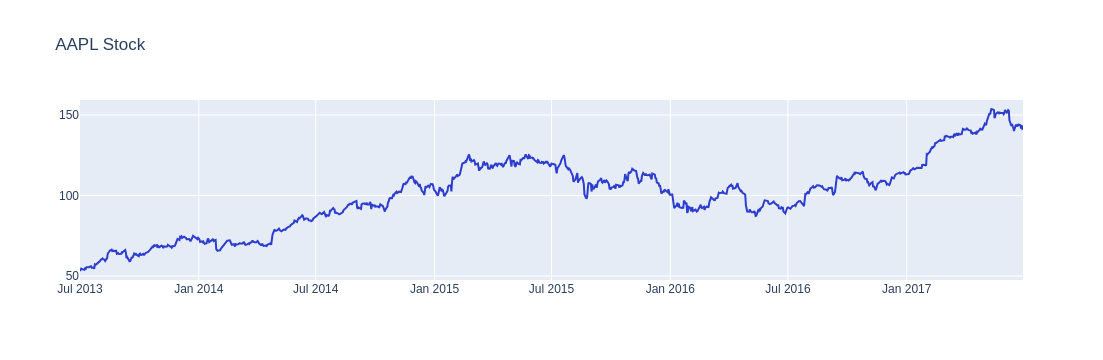

In [4]:
apple_ticker = 'AAPL'
project_helper.plot_stock(close[apple_ticker], '{} Stock'.format(apple_ticker))

In [5]:
def resample_prices(close_prices, freq='M'):
    """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    """
    # TODO: Implement Function
    # <DataFrame or Series>.resample(arguments).<aggregate function>
    resampled_close_prices = close_prices.resample(freq).last()
    
    return resampled_close_prices

project_tests.test_resample_prices(resample_prices)

Tests Passed


In [6]:
monthly_close = resample_prices(close)
project_helper.plot_resampled_prices(
    monthly_close.loc[:, apple_ticker],
    close.loc[:, apple_ticker],
    '{} Stock - Close Vs Monthly Close'.format(apple_ticker))

ValueError: 
    Invalid value of type 'builtins.str' received for the 'mode' property of scatter
        Received value: 'line'

    The 'mode' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['lines', 'markers', 'text'] joined with '+' characters
        (e.g. 'lines+markers')
        OR exactly one of ['none'] (e.g. 'none')